In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# 2. Breast Cancer - Clasificación Alternativa

# Cargar dataset
bc = pd.read_csv("breast-cancer.csv")

# Convertir 'diagnosis' a numérico
le = LabelEncoder()
bc['diagnosis'] = le.fit_transform(bc['diagnosis'])  # M=1, B=0

In [4]:
# Seleccionar features y target
X_bc = bc.drop(['id','diagnosis'], axis=1)
y_bc = bc['diagnosis']

# Escalar variables
scaler = StandardScaler()
X_bc_scaled = scaler.fit_transform(X_bc)

In [5]:
# Split train-test
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc_scaled, y_bc, test_size=0.2, random_state=42, stratify=y_bc)

# Modelo Random Forest
rf_bc = RandomForestClassifier(random_state=42)

In [6]:
# Grid Search para optimización
param_grid_bc = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}
grid_bc = GridSearchCV(rf_bc, param_grid_bc, cv=5, scoring='accuracy')
grid_bc.fit(X_train_bc, y_train_bc)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [7]:
# Mejor modelo
best_rf_bc = grid_bc.best_estimator_

In [8]:
# Predicciones y evaluación
y_pred_bc = best_rf_bc.predict(X_test_bc)
print("Breast Cancer - Classification Report")
print(classification_report(y_test_bc, y_pred_bc))
print("Accuracy:", accuracy_score(y_test_bc, y_pred_bc))

Breast Cancer - Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


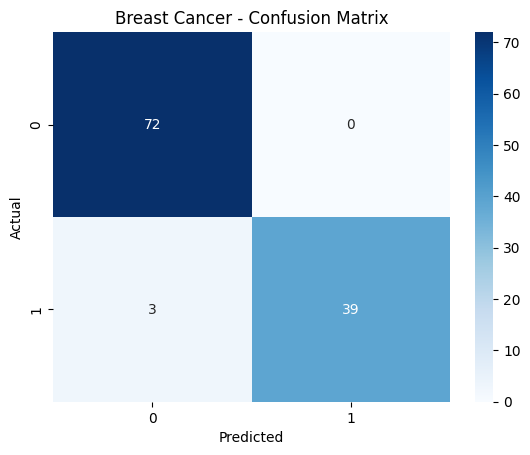

In [9]:
# Confusion matrix
cm_bc = confusion_matrix(y_test_bc, y_pred_bc)
sns.heatmap(cm_bc, annot=True, fmt='d', cmap='Blues')
plt.title("Breast Cancer - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# 3. Beisbol - Clasificación Alternativa

# Cargar dataset
bb = pd.read_csv("beisbol.csv")

# Convertir 'runs' a clasificación binaria (alta/baja)
threshold = bb['runs'].median()
bb['runs_class'] = (bb['runs'] > threshold).astype(int)  # 1 = alta, 0 = baja

In [11]:
# One-hot encoding para 'equipos'
bb_encoded = pd.get_dummies(bb, columns=['equipos'], drop_first=True)

# Features y target
X_bb = bb_encoded.drop(['runs','runs_class'], axis=1)
y_bb = bb_encoded['runs_class']

In [12]:
# Escalar variables
scaler_bb = StandardScaler()
X_bb_scaled = scaler_bb.fit_transform(X_bb)

# Split train-test
X_train_bb, X_test_bb, y_train_bb, y_test_bb = train_test_split(X_bb_scaled, y_bb, test_size=0.2, random_state=42, stratify=y_bb)

In [13]:
# Modelo Random Forest
rf_bb = RandomForestClassifier(random_state=42)

# Grid Search
param_grid_bb = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}
grid_bb = GridSearchCV(rf_bb, param_grid_bb, cv=5, scoring='accuracy')
grid_bb.fit(X_train_bb, y_train_bb)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [14]:
# Mejor modelo
best_rf_bb = grid_bb.best_estimator_

In [15]:
# Predicciones y evaluación
y_pred_bb = best_rf_bb.predict(X_test_bb)
print("Beisbol - Classification Report")
print(classification_report(y_test_bb, y_pred_bb))
print("Accuracy:", accuracy_score(y_test_bb, y_pred_bb))

Beisbol - Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

Accuracy: 0.8333333333333334


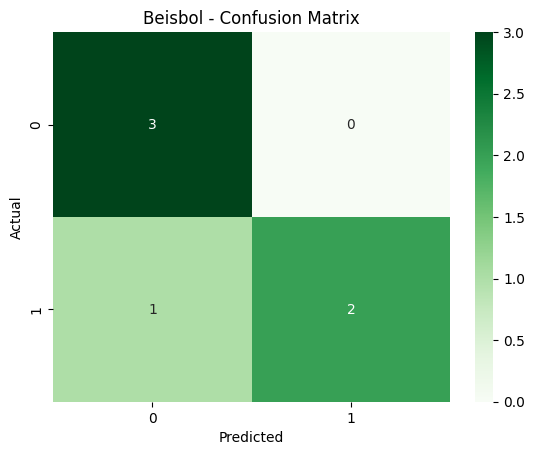

In [16]:
# Confusion matrix
cm_bb = confusion_matrix(y_test_bb, y_pred_bb)
sns.heatmap(cm_bb, annot=True, fmt='d', cmap='Greens')
plt.title("Beisbol - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()